In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
df=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/text_spam.csv",encoding="Latin-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
# df['v1'] = df['v1'].astype(str)


In [12]:
# sns.countplot(df['v1'])
# plt.ylabel('Label')
# plt.title('Number of ham and spam messages')

In [20]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [21]:
values = df['v1'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 86.59368269921033
percentage of 1 : 13.406317300789663


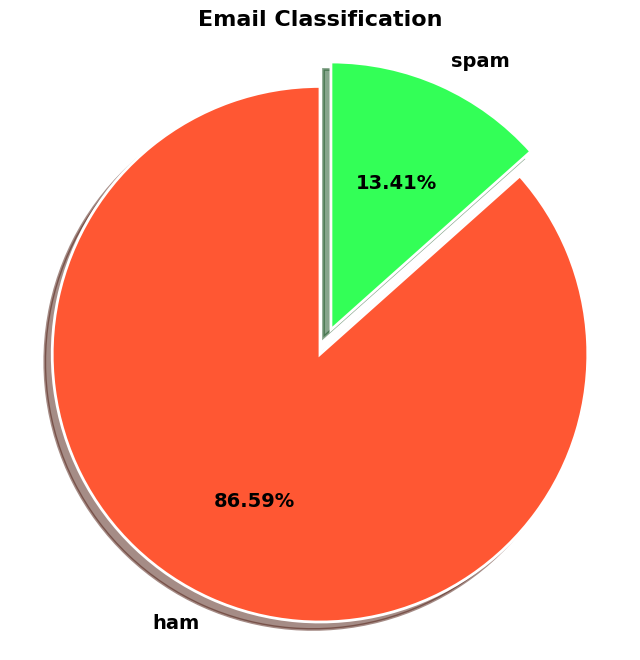

In [22]:
import matplotlib.pyplot as plt
colors = ['#FF5733', '#33FF57']

explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

In [23]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [24]:
label_mapping = {label: index for index, label in enumerate(le.classes_)}

# Print the mapping
for label, encoded_value in label_mapping.items():
    print(f"{label} -----> {encoded_value}")


ham -----> 0
spam -----> 1


In [25]:
Y.dtype

dtype('int64')

In [26]:
print(X.dtype)

object


In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)


In [28]:
X_train.shape

(4736,)

In [29]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [30]:
sequences_matrix

array([[  0,   0,   0, ...,   5, 135,   2],
       [  0,   0,   0, ...,  22,   3, 157],
       [  0,   0,   0, ..., 193, 609,   5],
       ...,
       [  0,   0,   0, ..., 249,   2, 339],
       [  0,   0,   0, ...,  71,   4, 147],
       [  0,   0,   0, ..., 916,  93, 145]], dtype=int32)

In [31]:
def LSTM_MODEL():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [32]:
model = LSTM_MODEL()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

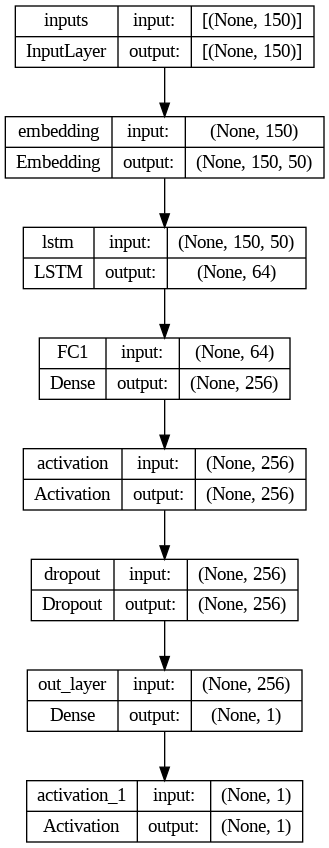

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)

In [33]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 8s 113ms/step - loss: 0.3879 - accuracy: 0.8672 - val_loss: 0.2979 - val_accuracy: 0.8502
Epoch 2/10
30/30 [==============================] - 2s 65ms/step - loss: 0.1613 - accuracy: 0.9525 - val_loss: 0.1006 - val_accuracy: 0.9789
Epoch 3/10
30/30 [==============================] - 3s 85ms/step - loss: 0.0735 - accuracy: 0.9820 - val_loss: 0.0697 - val_accuracy: 0.9800
Epoch 4/10
30/30 [==============================] - 2s 59ms/step - loss: 0.0472 - accuracy: 0.9873 - val_loss: 0.0684 - val_accuracy: 0.9800
Epoch 5/10
30/30 [==============================] - 2s 58ms/step - loss: 0.0342 - accuracy: 0.9916 - val_loss: 0.0650 - val_accuracy: 0.9800
Epoch 6/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0268 - accuracy: 0.9937 - val_loss: 0.0659 - val_accuracy: 0.9821


In [34]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [35]:
accuracy = model.evaluate(test_sequences_matrix,Y_test)


27/27 [==============================] - 0s 7ms/step - loss: 0.0572 - accuracy: 0.9844


In [36]:
print('Test set\n  Loss: {:.2f}\n  Accuracy: {:0.2f}'.format(accuracy[0],accuracy[1]))

Test set
  Loss: 0.06
  Accuracy: 0.98
